In [1]:
# Simple MA: arithmatic average
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
TsingTao=pd.read_csv('TsingTao.csv')
TsingTao.index=TsingTao.iloc[:,1]
TsingTao.index=pd.to_datetime(TsingTao.index, format='%Y-%m-%d')
TsingTao=TsingTao.iloc[:,2:]
TsingTao.head(n=3)

,Open,High,Low,Close,Volume
Date,,,,,
2014-01-02,48.80,48.98,46.90,47.81,2592800
2014-01-03,47.60,48.38,47.01,47.59,1560700
2014-01-06,47.63,47.79,46.62,46.70,1860900


In [2]:
Close=TsingTao.Close

Text(0.5,1,'2014 close of QD beer')

/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


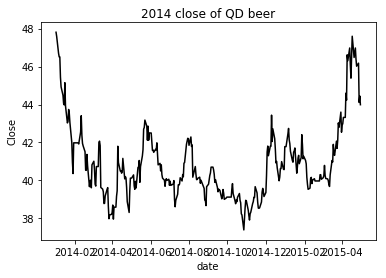

In [3]:
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.plot(Close,'k')
plt.xlabel('date')
plt.ylabel('Close')
plt.title('2014 close of QD beer')

In [4]:
Sma5=pd.Series(0.0,index=Close.index)
for i in range(4,len(Close)):
    Sma5[i]=np.mean(Close[(i-4):(i+1)])
Sma5.tail()

Date
2015-04-24    46.522
2015-04-27    46.462
2015-04-28    45.936
2015-04-29    45.430
2015-04-30    44.950
dtype: float64

/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


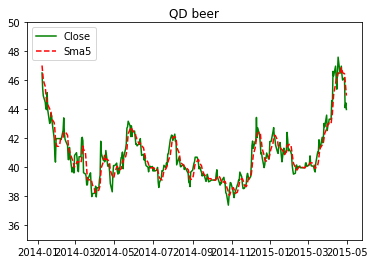

In [5]:
plt.plot(Close[4:],label="Close",color='g')
plt.plot(Sma5[4:],label="Sma5",color='r',linestyle='dashed')
plt.title("QD beer")
plt.ylim(35,50)
plt.legend()

In [6]:
# we write a function to compute MAs
def smaCal(tsPrice,k):
    import pandas as pd
    Sma=pd.Series(0.0,index=tsPrice.index)
    for i in range(k-1,len(Close)):
        Sma[i]=sum(Close[(i-k+1):(i+1)])/k
    return(Sma)

In [7]:
sma5=smaCal(Close ,5)    
sma5.tail()

Date
2015-04-24    46.522
2015-04-27    46.462
2015-04-28    45.936
2015-04-29    45.430
2015-04-30    44.950
dtype: float64

In [8]:
# weighted MA
# we want to show the difference between different time gaps
b=np.array([1,2,3,4,5])
w=b/sum(b)
w

array([ 0.06666667,  0.13333333,  0.2       ,  0.26666667,  0.33333333])

In [9]:
m1Close=Close[0:5]
wec=w*m1Close
sum(wec) 
# the first 5 days

46.778666666666666

In [10]:
Wma5=pd.Series(0.0,index=Close.index)
for i in range(4,len(Close)):
    Wma5[i]=sum(w*Close[(i-4):(i+1)])
Wma5[2:7]

Date
2014-01-06     0.000000
2014-01-07     0.000000
2014-01-08    46.778667
2014-01-09    46.250667
2014-01-10    45.710667
dtype: float64

/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


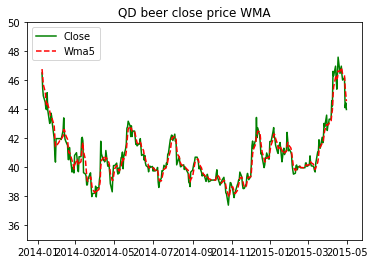

In [11]:
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.plot(Close[4:],label="Close",color='g')
plt.plot(Wma5[4:],label="Wma5",color='r',linestyle='dashed')
plt.title("QD beer close price WMA")
plt.ylim(35,50)
plt.legend()

In [12]:
# write a function to compute WMA
def wmaCal(tsPrice,weight):
   import pandas as pd
   import numpy as np
   k=len(weight)
   arrWeight=np.array(weight)
   Wma=pd.Series(0.0,index=tsPrice.index)
   for i in range(k-1,len(tsPrice.index)):
       Wma[i]=sum(arrWeight*tsPrice[(i-k+1):(i+1)])
   return(Wma)

In [13]:
wma5=wmaCal(Close,w)   
wma5.head()

Date
2014-01-02     0.000000
2014-01-03     0.000000
2014-01-06     0.000000
2014-01-07     0.000000
2014-01-08    46.778667
dtype: float64

In [14]:
wma5=wmaCal(Close,[0.1,0.15,0.2,0.25,0.3])
wma5.tail()

Date
2015-04-24    46.4585
2015-04-27    46.3580
2015-04-28    45.6385
2015-04-29    45.1405
2015-04-30    44.6605
dtype: float64

In [15]:
# Exponential WMA
# it is indeed a kind of special WMA
# EWMA_t=\alpha*(p_t+p_t-1*(1-\alpha)+...+p_k+1*(1-\alpha)^t-k-1)+EWMA_t=k*(1-\alpha)^t-k
# weights are powers of 1-\alpha
# the first term
Ema5_number1=np.mean(Close[0:5])
Ema5_number2=0.2* Close[5]+(1-0.2)*Ema5_number1
Ema5=pd.Series(0.0,index=Close.index)
Ema5[4]=Ema5_number1
Ema5[5]=Ema5_number2

In [16]:
# general case
for i in range(6,len(Close)):
    expo=np.array(sorted(range(i-4),reverse=True))
    w=(1-0.2)**expo
    Ema5[i]=sum(0.2*w*Close[5:(i+1)])+Ema5_number1*0.2**(i-5)
Ema5.tail()

Date
2015-04-24    46.283839
2015-04-27    46.263071
2015-04-28    45.832457
2015-04-29    45.555965
2015-04-30    45.242772
dtype: float64

/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


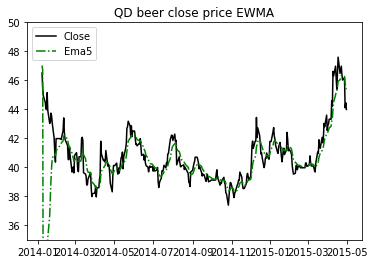

In [17]:
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.plot(Close[4:],label="Close",color='k')
plt.plot(Ema5[4:],label="Ema5",\
         color='g',linestyle='-.')
plt.title("QD beer close price EWMA")
plt.ylim(35,50)
plt.legend()

In [19]:
# write a function
def ewmaCal(tsprice,period=5,exponential=0.2):
   import pandas as pd
   import numpy as np
   Ewma=pd.Series(0.0,index=tsprice.index)
   Ewma[period-1]=np.mean(tsprice[:period])
   for i in range(period,len(tsprice)):
       Ewma[i]=exponential*tsprice[i]+(1-exponential)*Ewma[i-1]
   return(Ewma)

In [20]:
Ewma=ewmaCal(Close,5,0.2)
Ewma.tail()

Date
2015-04-24    46.283839
2015-04-27    46.263071
2015-04-28    45.832457
2015-04-29    45.555965
2015-04-30    45.242772
dtype: float64

In [21]:
# write a module and call it 
import movingAverage as ma
Ewma10=ma.ewmaCal(Close,10,0.2)
Ewma10.tail(n=3)

Date
2015-04-28    45.832457
2015-04-29    45.555965
2015-04-30    45.242772
dtype: float64

In [22]:
# compare between different methods
# local or overall
# equal weights or different weights
# BOC example
ChinaBank=pd.read_csv('ChinaBank.csv')
ChinaBank.index=ChinaBank.iloc[:,1]
ChinaBank.index=pd.to_datetime(ChinaBank.index, format='%Y-%m-%d')
ChinaBank=ChinaBank.iloc[:,2:]
CBClose=ChinaBank.Close
CBClose.describe()

count    345.000000
mean       3.145739
std        0.775868
min        2.450000
25%        2.600000
50%        2.700000
75%        3.890000
max        5.060000
Name: Close, dtype: float64

In [23]:
Close15=CBClose['2015']
Sma10=ma.smaCal(Close15,10)
Sma10.tail(n=3)

Date
2015-04-28    4.815
2015-04-29    4.841
2015-04-30    4.845
dtype: float64

In [24]:
weight=np.array(range(1,11))/sum(range(1,11))
Wma10=ma.wmaCal(Close15,weight)
Wma10.tail(n=3)

Date
2015-04-28    4.834364
2015-04-29    4.862545
2015-04-30    4.862364
dtype: float64

In [25]:
expo= 2/(len(Close15)+1)
Ema10=ma.ewmaCal(Close15,10,expo)
Ema10.tail(n=3)

Date
2015-04-28    4.427053
2015-04-29    4.439534
2015-04-30    4.448741
dtype: float64

/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


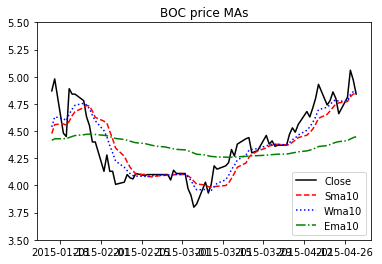

In [27]:
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.plot(Close15[10:],label="Close",color='k')
plt.plot(Sma10[10:],label="Sma10",color='r',linestyle='dashed')
plt.plot(Wma10[10:],label="Wma10",color='b',linestyle=':')
plt.plot(Ema10[10:],label="Ema10",color='G',linestyle='-.')
plt.title("BOC price MAs")
plt.ylim(3.5,5.5)
plt.legend()

/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


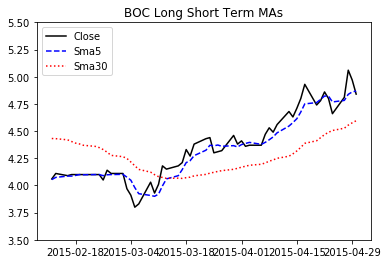

In [28]:
# it is very important to choose the time window
Sma5=ma.smaCal(Close15,5)
Sma30=ma.smaCal(Close15,30)
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.plot(Close15[30:],label="Close",color='k')
plt.plot(Sma5[30:],label="Sma5",color='b',linestyle='dashed')
plt.plot(Sma30[30:],label="Sma30",color='r',linestyle=':')
plt.title("BOC Long Short Term MAs")
plt.ylim(3.5,5.5)
plt.legend()

In [30]:
# MA trading system
# trading time
# trading-sma10 and close
CBSma10=ma.smaCal(CBClose,10)
SmaSignal=pd.Series(0,index=CBClose.index)
for i in range(10,len(CBClose)):
    if all([CBClose[i]>CBSma10[i],CBClose[i-1]<CBSma10[i-1]]):
        SmaSignal[i]=1;
    elif all([CBClose[i]<CBSma10[i],CBClose[i-1]>CBSma10[i-1]]):
         SmaSignal[i]=-1;
SmaTrade=SmaSignal.shift(1).dropna()
SmaTrade.tail(n=5)

Date
2015-04-24    0.0
2015-04-27   -1.0
2015-04-28    1.0
2015-04-29    0.0
2015-04-30    0.0
dtype: float64

In [31]:
# MAs can be explained as pressure line and support line
# use above idea to find trading time
SmaBuy=SmaTrade[SmaTrade==1]
SmaBuy.head(n=3)

Date
2014-01-23    1.0
2014-01-29    1.0
2014-02-11    1.0
dtype: float64

In [32]:
SmaSell=SmaTrade[SmaTrade==-1]
SmaSell.head(n=3)

Date
2014-01-24   -1.0
2014-02-10   -1.0
2014-02-25   -1.0
dtype: float64

In [33]:
# compute returns
CBRet=CBClose/CBClose.shift(1)-1
SmaRet=(CBRet*SmaTrade).dropna()

In [34]:
# accumulate returns
cumStock=np.cumprod(1+CBRet[SmaRet.index[0]:])-1
cumTrade=np.cumprod(1+SmaRet)-1
cumdata=pd.DataFrame({'cumTrade':cumTrade,\
                     'cumStock':cumStock})
cumdata.iloc[-6:,:]

,cumTrade,cumStock
Date,,
2015-04-23,-0.100261,0.839080
2015-04-24,-0.100261,0.785441
2015-04-27,-0.129223,0.842912
2015-04-28,-0.083964,0.938697
2015-04-29,-0.083964,0.904215
2015-04-30,-0.083964,0.854406


/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


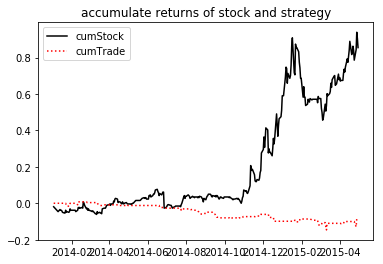

In [35]:
plt.plot(cumStock,label="cumStock",color='k')
plt.plot(cumTrade,label="cumTrade",color='r',linestyle=':')
plt.title("accumulate returns of stock and strategy")
plt.legend()
# it is very bad

In [36]:
# accurate rate
SmaRet[SmaRet==(-0)]=0
smaWinrate=len(SmaRet[SmaRet>0])/len(SmaRet[SmaRet!=0])
smaWinrate
# very low

0.3157894736842105

In [37]:
# double MAs strategy
# short and long terms
Ssma5=ma.smaCal(CBClose,5);
Lsma30=ma.smaCal(CBClose,30);
SLSignal=pd.Series(0,index=Lsma30.index)
for i in range(1,len(Lsma30)):
    if all([Ssma5[i]>Lsma30[i],Ssma5[i-1]<Lsma30[i-1]]):
        SLSignal[i]=1
    elif all([Ssma5[i]<Lsma30[i],Ssma5[i-1]>Lsma30[i-1]]):
         SLSignal[i]=-1

In [39]:
SLSignal[SLSignal==1]

Date
2014-03-26    1
2014-05-13    1
2014-07-29    1
2014-09-05    1
2014-10-06    1
2014-10-31    1
2015-03-16    1
dtype: int64

In [40]:
SLSignal[SLSignal==-1]

Date
2014-03-03   -1
2014-05-02   -1
2014-06-27   -1
2014-08-29   -1
2014-09-23   -1
2014-10-08   -1
2015-02-03   -1
dtype: int64

In [41]:
# buy win rate
SLTrade=SLSignal.shift(1)
Long=pd.Series(0,index=Lsma30.index)
Long[SLTrade==1]=1
CBRet=CBClose/CBClose.shift(1)-1
LongRet=(Long*CBRet).dropna()
winLrate=len(LongRet[LongRet>0])/len(LongRet[LongRet!= 0] )
winLrate

0.5

In [42]:
# sell win rate
Short= pd.Series(0,index=Lsma30.index)
Short[SLTrade==-1]=-1
ShortRet=(Short*CBRet).dropna()
winSrate=len(ShortRet[ShortRet>0])/len(ShortRet[ShortRet!=0])
winSrate

0.4

In [43]:
# all win rate
SLtradeRet=(SLTrade*CBRet).dropna()
winRate= len(SLtradeRet[ SLtradeRet>0])/len(\
         SLtradeRet[SLtradeRet!=0])
winRate

0.4444444444444444

/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


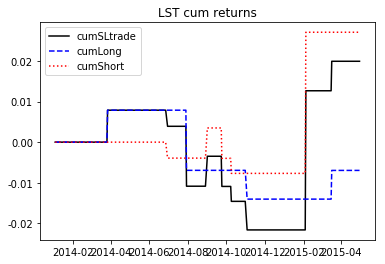

In [45]:
# three kinds of strategies, buy, sell and buy & sell
cumLong=np.cumprod(1+LongRet)-1
cumShort=np.cumprod(1+ShortRet)-1
cumSLtrade=np.cumprod(1+SLtradeRet)-1

plt.rcParams['axes.unicode_minus'] = False
plt.plot(cumSLtrade,label="cumSLtrade",color='k')
plt.plot(cumLong, label="cumLong",\
         color='b',linestyle='dashed')
plt.plot(cumShort,label="cumShort",\
         color='r',linestyle=':')
plt.title("LST cum returns")
plt.legend(loc='best')

In [46]:
# MACD (MA Convergence and Divergence)
# derived from EWMA
# MACD indexes consists of 2 lines (DIF / Differential value and DEA / ) and a cylinder (MACD)

In [47]:
# DIF=EMA_(close,12)-EMA_(close,26)
# fast line
DIF=ma.ewmaCal(CBClose,12,2/(1+12))\
       -ma.ewmaCal(CBClose,26,2/(1+26))
DIF.tail(n=3)

Date
2015-04-28    0.150903
2015-04-29    0.155585
2015-04-30    0.147109
dtype: float64

In [48]:
# DEA=EMA_(DIF,9)
# signal line / slow line
DEA=ma.ewmaCal(DIF,9,2/(1+9))
DEA.tail()

Date
2015-04-24    0.133966
2015-04-27    0.133887
2015-04-28    0.137290
2015-04-29    0.140949
2015-04-30    0.142181
dtype: float64

In [49]:
# MACD
MACD=DIF-DEA
MACD.tail(n=3)

Date
2015-04-28    0.013613
2015-04-29    0.014636
2015-04-30    0.004928
dtype: float64

/anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:1867: MatplotlibDeprecationWarning: The *left* kwarg to `bar` is deprecated use *x* instead. Support for *left* will be removed in Matplotlib 3.0
  return func(ax, *args, **kwargs)


/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


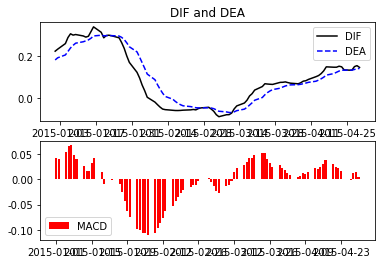

In [50]:
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.subplot(211)
plt.plot(DIF['2015'],\
      label="DIF",color='k')
plt.plot(DEA['2015'], label="DEA",\
        color='b',linestyle='dashed')
plt.title("DIF and DEA")
plt.legend()
plt.subplot(212)
plt.bar(left=MACD['2015'].index,\
        height=MACD['2015'],\
        label='MACD',color='r')
plt.legend()

In [51]:
# find trading time
macddata=pd.DataFrame()
macddata['DIF']= DIF['2015']
macddata['DEA']= DEA['2015']
macddata['MACD']= MACD['2015']

/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
/anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:1867: MatplotlibDeprecationWarning: The *left* kwarg to `bar` is deprecated use *x* instead. Support for *left* will be removed in Matplotlib 3.0
  return func(ax, *args, **kwargs)
/anaconda3/lib/

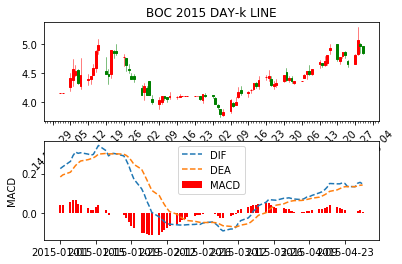

1

In [53]:
import candle
candle.candleLinePlots(ChinaBank['2015'],\
              candleTitle='BOC 2015 DAY-K LINE',\
              splitFigures=True,Data=macddata,\
              ylabel='MACD')

In [54]:
# involve other MA lines
macdSignal=pd.Series(0,index=DIF.index)
for i in range(1,len(DIF)):
    if all([DIF[i]>DEA[i]>0.0,DIF[i-1]<DEA[i-1]]):
        macdSignal[i]=1
    elif all([DIF[i]<DEA[i]<0.0,DIF[i-1]>DEA[i-1]]):
        macdSignal[i]=-1
macdSignal.tail()

Date
2015-04-24    0
2015-04-27    0
2015-04-28    1
2015-04-29    0
2015-04-30    0
dtype: int64

In [55]:
macdTrade=macdSignal.shift(1)

In [56]:
CBRet=CBClose/CBClose.shift(1)-1
macdRet=(CBRet*macdTrade).dropna()
macdRet[macdRet==-0]=0
macdWinRate=len(macdRet[macdRet>0])/len(macdRet[macdRet!=0])
macdWinRate

0.5

In [57]:
# combine MA, double MA and MACD strategies
AllSignal=SmaSignal+SLSignal+macdSignal
for i in AllSignal.index:
    if AllSignal[i]>1:
        AllSignal[i]=1
    elif AllSignal[i]<-1:
        AllSignal[i]=-1
    else:
        AllSignal[i]=0

In [58]:
AllSignal[AllSignal==1]

Date
2014-05-13    1
2015-01-21    1
dtype: int64

In [59]:
AllSignal[AllSignal==-1]

Date
2014-06-27   -1
2014-10-08   -1
2015-03-03   -1
dtype: int64

In [60]:
tradSig=AllSignal.shift(1).dropna()
CBClose=CBClose[-len(tradSig):]
asset=pd.Series(0.0,index=Close.index)
cash=pd.Series(0.0,index=CBClose.index)
share=pd.Series(0,index=CBClose.index)

In [61]:
# up 2 days more and no sell signal
# First long position
entry=3
cash[:entry]=20000
while entry<len(CBClose):
    cash[entry]=cash[entry-1]
    if all([CBClose[entry-1]>=CBClose[entry-2],\
            CBClose[entry-2]>=CBClose[entry-3],\
            AllSignal[entry-1]!=-1]):
        share[entry]=1000
        cash[entry]= cash[entry]-1000*CBClose[entry]
        break
    entry+=1

In [62]:
# trade according to signals
i=entry+1
while i<len(tradSig):
    cash[i]=cash[i-1]
    share[i]=share[i-1]
    flag=1
    if tradSig[i]==1:
        share[i]= share[i]+3000
        cash[i]=cash[i]-3000*CBClose[i]

    if all([tradSig[i]==-1,share[i]>0]):
        share[i]= share[i]-1000
        cash[i]=cash[i]+1000*CBClose[i]
    i+=1

In [63]:
asset=cash+share*CBClose

(0, 25000.0)

/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


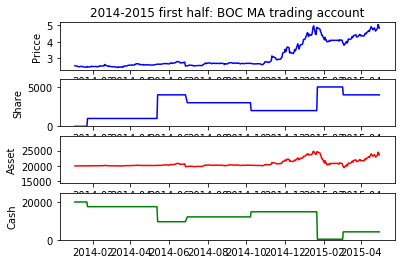

In [66]:
plt.subplot(411)
plt.title("2014-2015 first half: BOC MA trading account")
plt.plot(CBClose, color='b')
plt.ylabel("Pricce")
plt.subplot(412)
plt.plot(share, color='b')
plt.ylabel("Share")
plt.ylim(0,max(share)+1000)
plt.subplot(413)
plt.plot(asset,label="asset",color='r')
plt.ylabel("Asset")
plt.ylim(min(asset)-5000,max(asset)+5000)
plt.subplot(414)
plt.plot(cash, label="cash",color='g')
plt.ylabel("Cash")
plt.ylim(0,max(cash)+5000)

In [68]:
# returns (no frictions)
TradeReturn=(asset[-1]-20000)/20000
TradeReturn
# return is 17.85%

0.17849999999999999